## Intro

In this notebook, we'll try using different traditional ML algorithms to solve the emails classification challenge. For this task, we'll take 6 categories into consideration.

Categories:
1) Rechnungen 
2) Mahnungen 
3) Vertraege und Vereinbarun 
4) Storno 
5) Aktivierung Sim 
6) Tarife 

The approches we'll use are SVM, Logistic regression, Random forest, and MultinomialNB

## Manage directories

In [1]:
import os

In [2]:
dataset_path = "short_dataset.csv"

## EDA

In [52]:
import pandas as pd 

pd.__version__

'2.1.0'

In [53]:
# converting csv file to pandas dataframe 
df = pd.read_csv(dataset_path)

In [54]:
df.head()

,Unnamed: 0,Category,Content
0,0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
1,1,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
2,2,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
3,3,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
4,4,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...


In [55]:
df = df.drop('Unnamed: 0', axis=1)

In [56]:
df.head()

,Category,Content
0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
1,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
2,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
3,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
4,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...


In [57]:
print(df['Content'][0])

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	06.06.2001 08:46:53
Betreff:	E-Mail Beantwortung

	  



Anrede         : Frau
Name           : Sim Karte Gesperrt Thielsch Kai
Handyrufnummer : 49 178 8820181
Account Nummer :
Handymodell    : 6150
Provider       : E-Plus Service
Email          : kaithielsch@gmx.de
-------------------------------------
Nachricht      : Liebes e plus Team
Ich habe aus versehen meinen Pin und den darauffolgenden "puk" falsch 
eingegeben
Nun ist meine sim karte gesperrt
Wie kann ich einen neuen Pin bekommen damit mein handy wieder 
einsatzbereit ist??

Vielen dank im vorraus
Mit freundlichen grüßen
Kai Thielsch
-------------------------------------
--444043493.991813613145.JavaMail.nsuser@apps3mn1--




In [58]:
print(df['Category'][0])

TARIFE


The category of the email above is TARIFE

Now, we need to shuffle the dataset in order to avoid sample selection bias.

In [59]:
df = df.sample(frac=1)

In [60]:
df.head()

,Category,Content
4,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
142,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
133,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
285,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
191,STORNO,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...


In [61]:
# reset index 
df.reset_index(drop=True, inplace=True)

In [62]:
df.head()

,Category,Content
0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
1,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
2,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
3,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
4,STORNO,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...


In [63]:
# checking for Null values
df.isna().any()

Category    False
Content     False
dtype: bool

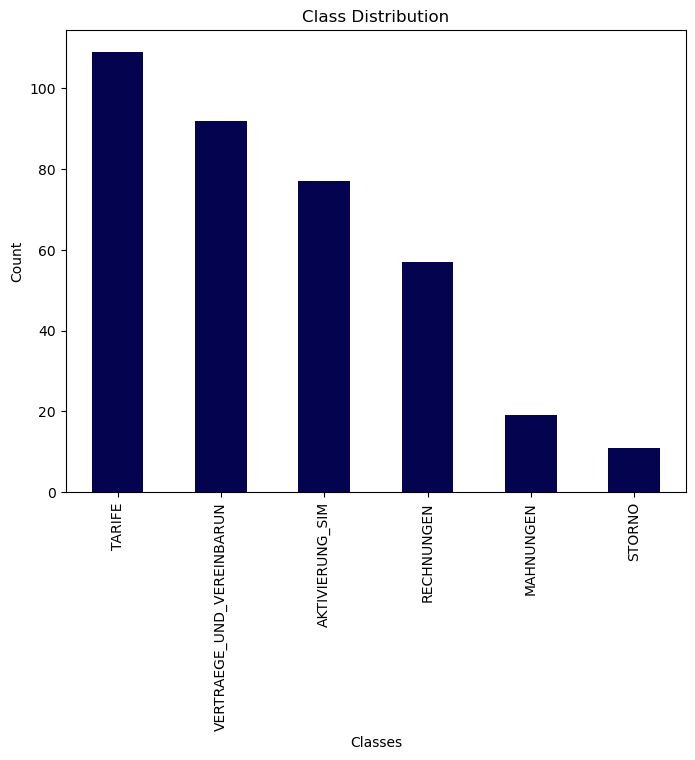

In [64]:
import matplotlib.pyplot as plt 

# Count the occurrences of each class
class_counts = df['Category'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=(0.01,0.01,0.31))
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

We obviously deal with the dataset imbalance, and possible soultions are over- and undersampling, but as for now we ignore the fact.

In [65]:
from text_cleaning import fetch_body

In [67]:
df['Email_body'] = df['Content'].apply(fetch_body)

In [68]:
df

,Category,Content,Email_body
0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...,"Sehr geehrte Damen und Herren , ich habe mein..."
1,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Bitte meine aktuellen Rechnungen Ohne Rufnumme...
2,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Kundennummer:1415228 Ich habe zum Dezember 20...
3,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,"Hallo! Ich habe ein Firmenhandy, das darüber h..."
4,STORNO,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Kd-Nr: 4631281 Hallo E-Plus ServiceTeam, ich..."
...,...,...,...
360,AKTIVIERUNG_SIM,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Beschwerde Sehr geehrte Damen und Herren, es ..."
361,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Hallo eplus-Team! Folgende Frage brennt mir a...
362,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrtes E-Plus Team, in welchem Ihrer Ta..."
363,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Hallo, mein Tarif Professional XL, somit koste..."


In [69]:
print(df['Email_body'][1])

Bitte meine aktuellen Rechnungen Ohne Rufnummernanzeige 


## Text cleaning

In [73]:
from text_cleaning import preprocess_text

In [74]:
df['Clean_texts'] = df['Email_body'].apply(preprocess_text)

In [75]:
df.head()

,Category,Content,Email_body,Clean_texts
0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...,"Sehr geehrte Damen und Herren , ich habe mein...",geehrt dam herr kennwort vergessen gerne kopie...
1,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Bitte meine aktuellen Rechnungen Ohne Rufnumme...,bitte aktuell rechnung rufnummernanzeig
2,RECHNUNGEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Kundennummer:1415228 Ich habe zum Dezember 20...,kundennummer:1415228 dezember 2000 kündigen be...
3,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,"Hallo! Ich habe ein Firmenhandy, das darüber h...",hallo firmenhandy hinaus privat line obig nr b...
4,STORNO,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Kd-Nr: 4631281 Hallo E-Plus ServiceTeam, ich...",kd-nr 4631281 hallo e-plus serviceteam brief e...


## Define the classifier 

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

/home/klychliiev/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/klychliiev/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/klychliiev/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/klychliiev/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/klychliiev/.lo

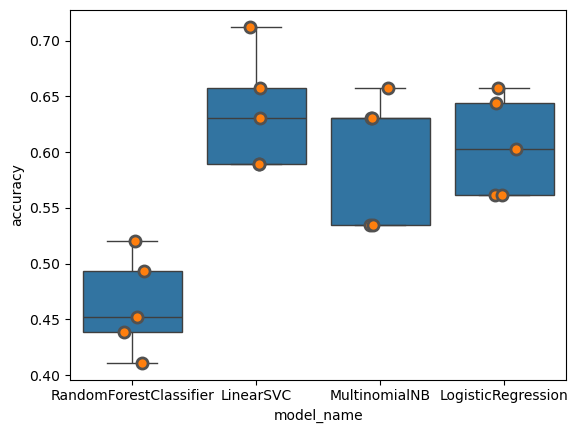

In [80]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df.Clean_texts).toarray()
labels = df.Category

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [81]:
categories_list = list(df['Category'].unique())

In [82]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.635616
LogisticRegression        0.605479
MultinomialNB             0.597260
RandomForestClassifier    0.463014
Name: accuracy, dtype: float64

Compare with the performance of the model trained on the unpreprocessed text:

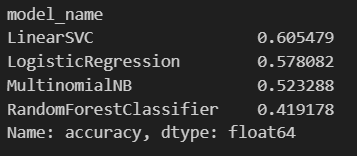

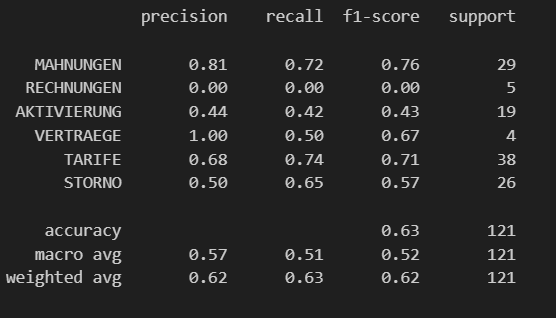

## <b>Issues:</b>
1) Imbalanced dataset 
2) Encoding problems:<br>
<em>vielen Dank fьr Ihre schnelle Antwort!!!</em> (must be <em>für</em>)
3) Cleaning method 
4) Small dataset
5) Abbreviations 